In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt

DEFAULT PARAMS (PauLisa.defaultParams)
 wavelength =1.064e-06m
 waist size(w0) =0.001m
 z0 =0m
 Rayleigh Range (Zr) =2.95262467443m


DEFAULT X,Y PLANE (PauLisa.defaultPlane)
 x: -0.02m to 0.02m with 1000 points.
 y: -0.02m to 0.02m with 1000 points.



Function Usage:
OPTICAL PARAMETERS DEFINITION     
 PARAMETERS=PauLisa.Params(wavelength,w0,z0)

PLANE OF PROPAGATION DEFINITION     
 PLANE=PauLisa.Plane(xmin,xmax,xpoints,ymin,ymax,ypoints) 

MODES DEFNITION AND DISPLAY     
 MODESARRAY=PauLisa.Modes((n1,m1,c1),(n2,m2,c2))     
 PauLisa.ShowModes(MODES) 

AMPLITUDE CALCULATIONS     
 Calculate amplitude over plane: RESULT=PauLisa.Calculate(PARAMS,PLANE,MODES,z) 
 Simple calculation from coordinates: PauLisa.Amplitude(PARAMS,x,y,z,MODES) 

INTENSITY PLOTTING     
 PauLisa.Contour(RESULT, **xlim,**ylim)     
 PauLisa.IntensitySliceX(y, *RESULT, **xlim)     
 PauLisa.IntensitySliceY(x, *RESULT, **xlim) 

PHASE CALCULATION     
 PauLisa.Phase(PARAMS,x,y,z,MODES) 

PHASE PLOTTING     
 Pau

In [2]:
a = pl.defaultParams
b = pl.defaultPlane

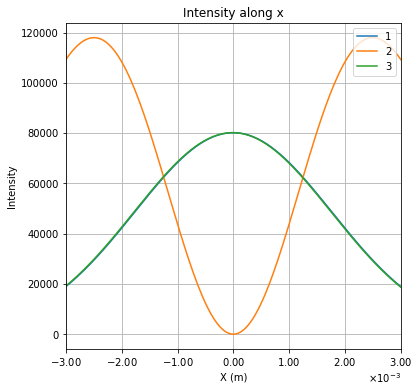

In [7]:
m0 = pl.Modes((0,0,1))
m1 = pl.Modes((1,0,1))
mm = pl.Modes((1,0,.1*1j),(0,0,1))

f0 =pl.Calculate(a,b,m0,10)
f1 = pl.Calculate(a,b,m1,10)
fmm = pl.Calculate(a,b,mm,10)

pl.IntensitySliceX(0,f0,f1,fmm,xlim=[-3e-3,3e-3])


In [8]:
print pl.peakInt(f0)
print pl.peakInt(fmm)

x=[0.]y=[0.]peak=80189.04939396899
<PauLisa.peakInt instance at 0x0000000009BB1688>
x=[0.]y=[0.]peak=80189.04939396927
<PauLisa.peakInt instance at 0x0000000009EDA688>


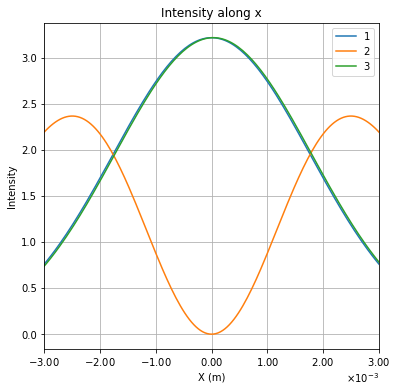

In [9]:
m0 = pl.Modes((0,0,1))
m1 = pl.Modes((1,0,1))
mm = pl.Modes((1,0,.1*1j),(0,0,1))

f0 =pl.Calculate2(a,b,m0,10)
f1 = pl.Calculate2(a,b,m1,10)
fmm = pl.Calculate2(a,b,mm,10)

pl.IntensitySliceX2(0,f0,f1,fmm,xlim=[-3e-3,3e-3])

In [10]:
print pl.peakInt(f0)
print pl.peakInt(fmm)

x=[0.]y=[0.]peak=3.2157006175722334
<PauLisa.peakInt instance at 0x0000000009E1E588>
x=[0.]y=[4.e-05]peak=3.2160987208400607
<PauLisa.peakInt instance at 0x000000000A047A08>
